## 📝Setting Library Imports

### Basic Imports

In [1]:
import numpy as np
import pandas as pd

### Graph Imports

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

### Metrics and Data Manipulation Imports

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Regression Imports

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

### Classification Imports

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

### Dataset Importing

In [6]:
df = pd.read_excel("EBA.xlsx")

## 📊 Dataset Description  

Before addressing missing values, it’s essential to understand the dataset's structure and summary statistics. Here's what we observed:  

In [7]:
print("🔍 Basic Information:")
df.info()

🔍 Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [8]:
print("\n❓ Missing Values:")
print(df.isnull().sum())


❓ Missing Values:
Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64


In [9]:
print("\n📈 Summary Statistics (Numeric Columns):")
print(df.describe())


📈 Summary Statistics (Numeric Columns):
                     Date of Joining   Designation  Resource Allocation  \
count                          22750  22750.000000         21369.000000   
mean   2008-07-01 09:28:05.274725120      2.178725             4.481398   
min              2008-01-01 00:00:00      0.000000             1.000000   
25%              2008-04-01 00:00:00      1.000000             3.000000   
50%              2008-07-02 00:00:00      2.000000             4.000000   
75%              2008-09-30 00:00:00      3.000000             6.000000   
max              2008-12-31 00:00:00      5.000000            10.000000   
std                              NaN      1.135145             2.047211   

       Mental Fatigue Score     Burn Rate  
count          20633.000000  21626.000000  
mean               5.728188      0.452005  
min                0.000000      0.000000  
25%                4.600000      0.310000  
50%                5.900000      0.450000  
75%                

In [10]:
print("\n🧾 Summary Statistics (Categorical Columns):")
print(df.describe(include='object'))


🧾 Summary Statistics (Categorical Columns):
                     Employee ID  Gender Company Type WFH Setup Available
count                      22750   22750        22750               22750
unique                     22750       2            2                   2
top     fffe32003000360033003200  Female      Service                 Yes
freq                           1   11908        14833               12290


## 📝 Cleaning missing Values  
We addressed missing values by dropping rows with `NaN` using the `dropna` method. This ensures the dataset is complete for analysis and avoids potential issues caused by incomplete data. 📉 While effective, it reduces the dataset size, so it’s important to consider if this approach fits your project needs.

In [11]:
df_cleaned = df.dropna()
df = df_cleaned
missing_summary = df_cleaned.isnull().sum()
print("Missing values after cleanup:\n", missing_summary)

Missing values after cleanup:
 Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64


## 📝 Preprocessing for Regression Algorithms (Setting and Splitting Data)

In [12]:
# Setting the data
X = df.drop(columns=['Burn Rate', 'Employee ID', 'Date of Joining'])
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

y = df['Burn Rate']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 📝 Regression Algorithms

### Regression Plotting Function

In [23]:
def plot_actual_vs_predicted_and_stats(y_test, y_pred, model_name, ax1, ax2):
    # Stats
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Display Stats on the left subplot (without box)
    stats_text = (f"{model_name} Stats:\n"
                  f"Mean Square Error : {mse:.2f}\n"
                  f"Root Mean Square Error : {rmse:.2f}\n"
                  f"Mean Absolute Error : {mae:.2f}\n"
                  f"R Squared Error : {r2:.2f}")
    
    ax1.text(0.1, 0.5, stats_text, fontsize=24, verticalalignment='center', horizontalalignment='left')
    ax1.axis('off')

    # Actual vs Predicted Plot on the right subplot
    ax2.scatter(y_test, y_pred, color='red', label='Actual', alpha=1)
    ax2.scatter(y_test, y_pred, color='blue', label='Predicted', alpha=0.7)
    ax2.set_title(f'{model_name}: Actual vs Predicted', fontsize=14)
    ax2.set_xlabel('Actual', fontsize=12)
    ax2.set_ylabel('Predicted', fontsize=12)
    ax2.legend(loc='best')

### 📈 1. Linear Regression

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

### 📈 2. Random Forest Regression

In [15]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

### 📈 3. Gradient Boosting Regression

In [16]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

### 📈 4. Support Vector Regression

In [17]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

### 📈 ALL Regression Plots

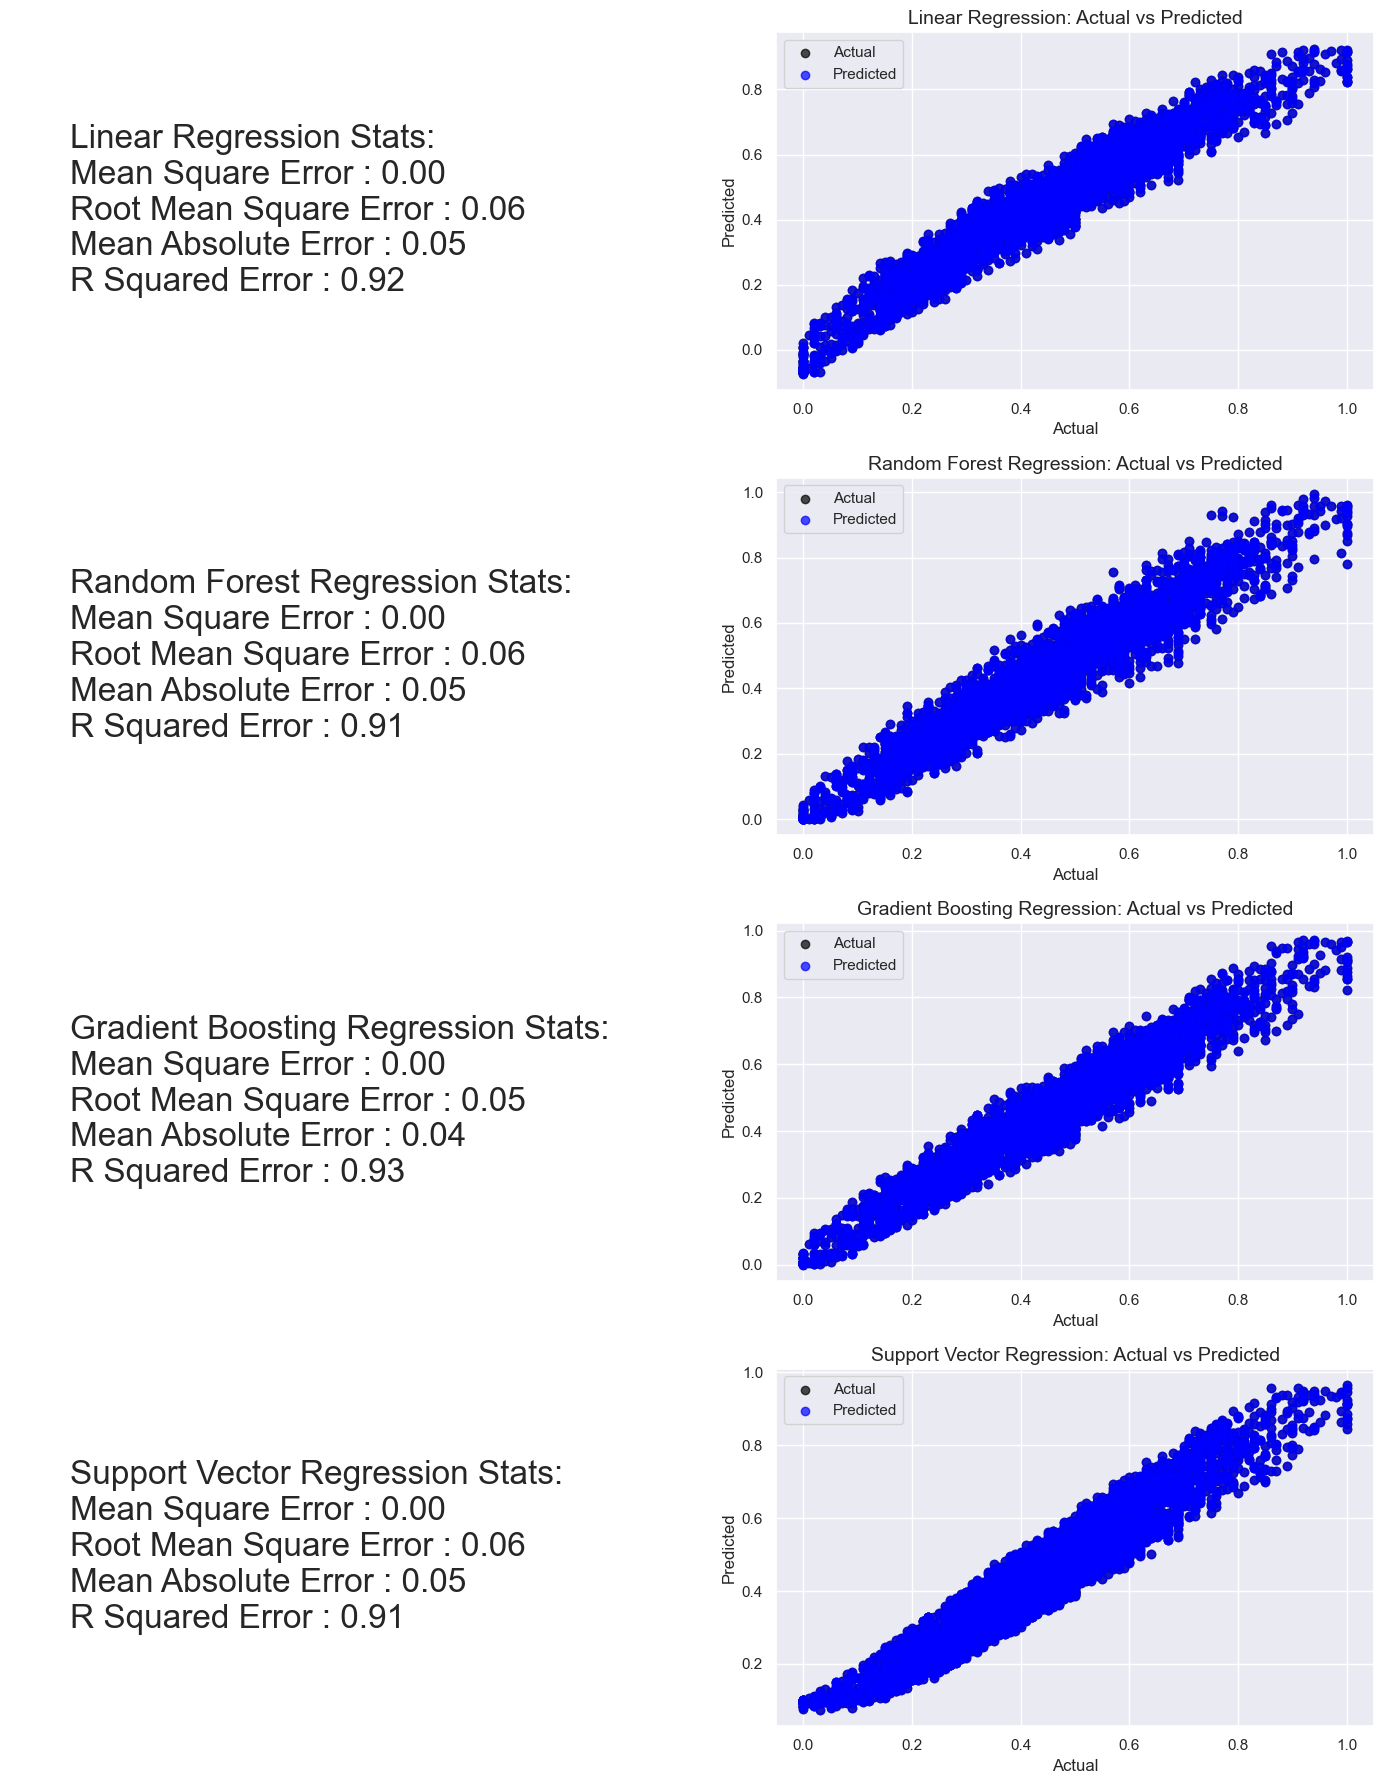

In [18]:
# Create a figure with 4 plots, each containing 2 subplots (stats and Actual vs Predicted)
fig, axes = plt.subplots(4, 2, figsize=(14, 18))
plot_actual_vs_predicted_and_stats(y_test, y_pred_lr, "Linear Regression", axes[0, 0], axes[0, 1])
plot_actual_vs_predicted_and_stats(y_test, y_pred_rf, "Random Forest Regression", axes[1, 0], axes[1, 1])
plot_actual_vs_predicted_and_stats(y_test, y_pred_gb, "Gradient Boosting Regression", axes[2, 0], axes[2, 1])
plot_actual_vs_predicted_and_stats(y_test, y_pred_svr, "Support Vector Regression", axes[3, 0], axes[3, 1])
plt.tight_layout()
plt.show()

## 📝 Classification Algorithms

### Preprocessing for Classification Algorithms (Setting and Splitting Data)

In [19]:
# Encoding categorical variables
categorical_columns = X.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
y = (df['Burn Rate'] > df['Burn Rate'].median()).astype(int)  # Assuming Burn Rate > median indicates burnout

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Classification Plotting Function

In [20]:
# Define a function for displaying results
def display_classification_results(y_test, y_pred, model_name, ax1, ax2):
    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Stats Text
    stats_text = (f"{model_name} Stats:\n"
                  f"Accuracy: {accuracy:.2f}\n"
                  f"Precision: {precision:.2f}\n"
                  f"Recall: {recall:.2f}\n"
                  f"F1 Score: {f1:.2f}")
    
    # Display Stats on the left subplot (without box)
    ax1.text(0.1, 0.5, stats_text, fontsize=24, verticalalignment='center', horizontalalignment='left')
    ax1.axis('off')

    # Confusion Matrix on the right subplot
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Burnout', 'Burnout'], yticklabels=['No Burnout', 'Burnout'], ax=ax2)
    ax2.set_title(f'{model_name}: Confusion Matrix', fontsize=14)
    ax2.set_xlabel('Predicted', fontsize=12)
    ax2.set_ylabel('Actual', fontsize=12)



### Setting Classification Algorithms and PLotting

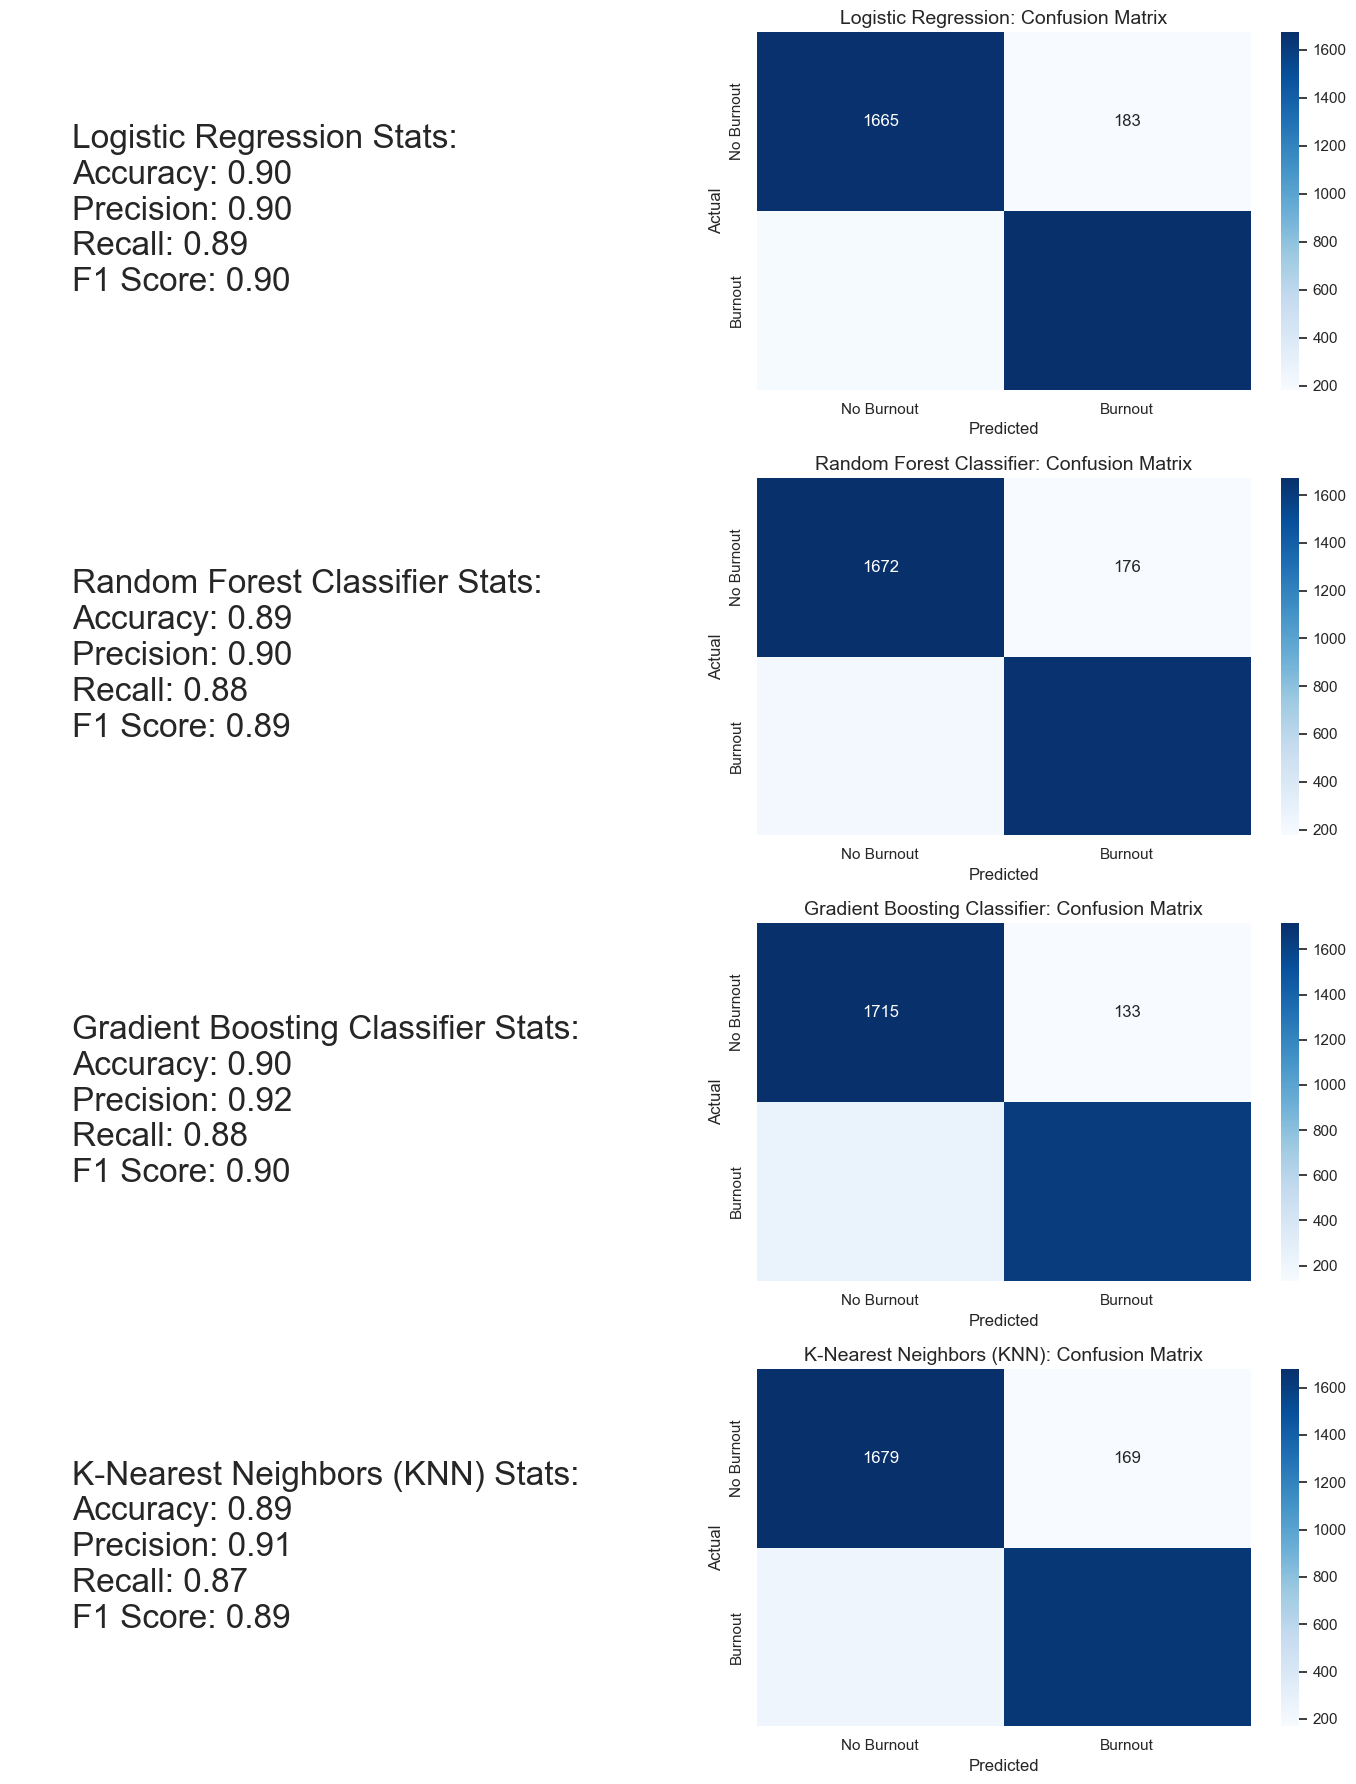

In [21]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier()
}

# Create a figure with 4 plots, each containing 2 subplots (stats and Confusion Matrix)
fig, axes = plt.subplots(4, 2, figsize=(14, 18))

# Loop over each model, fit, predict, and plot results
for i, (model_name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Plotting stats and confusion matrix for each model
    display_classification_results(y_test, y_pred, model_name, axes[i, 0], axes[i, 1])

# Adjust layout for better presentation
plt.tight_layout()
plt.show()


## 📝 Conclusion

### Conclusion Plotting for Regression algorithm

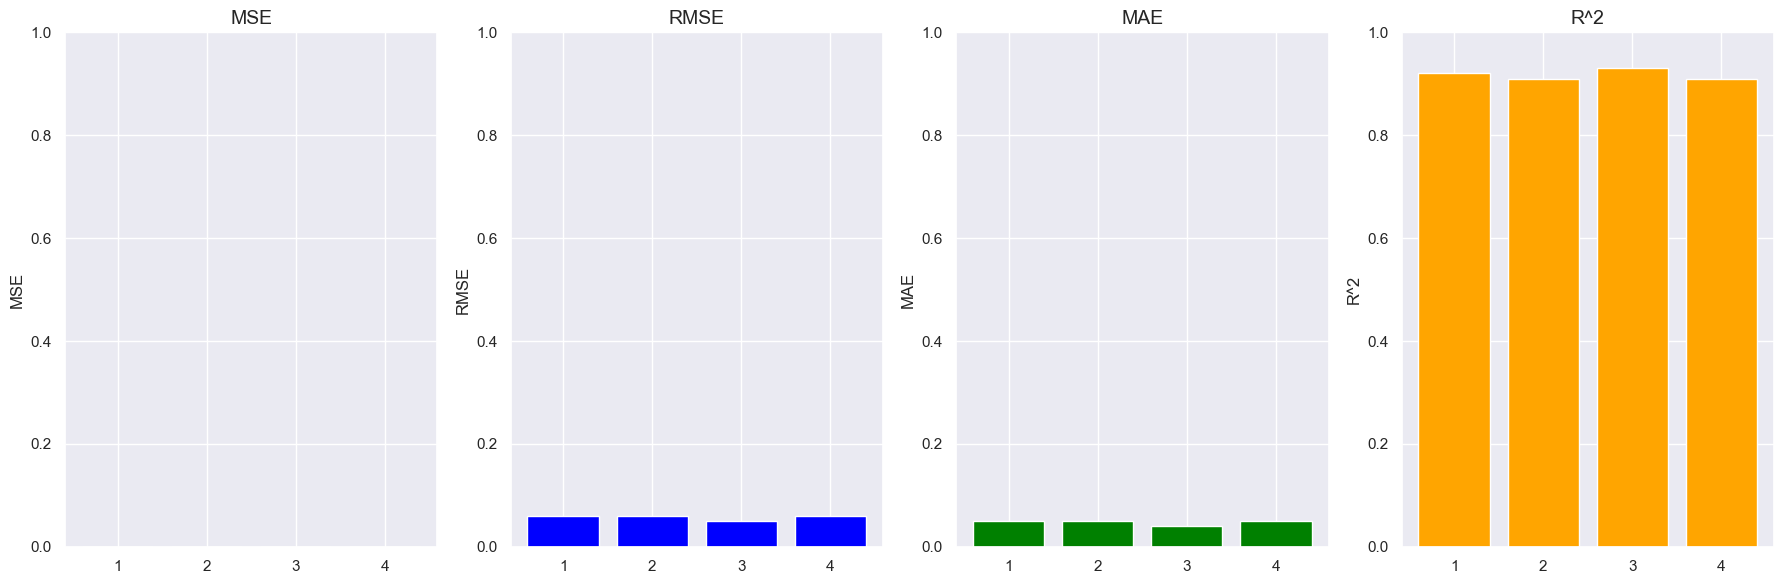

In [24]:
mean_square_error = [0, 0, 0, 0] 
root_mean_square_error = [0.06, 0.06,0.05,0.06]
mean_absolute_error = [0.05, 0.05,0.04,0.05]
r_squared_error = [0.92, 0.91, 0.93, 0.91] 

# Create a 1x4 subplot grid (4 plots in one row)
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

axes[0].bar(range(1, 5), mean_square_error, color='purple')
axes[0].set_title('MSE', fontsize=14)
axes[0].set_ylim(0, 1)
axes[0].set_ylabel('MSE', fontsize=12)
axes[0].set_xticks(range(1, 5))

axes[1].bar(range(1, 5), root_mean_square_error, color='blue')
axes[1].set_title('RMSE', fontsize=14)
axes[1].set_ylim(0, 1)
axes[1].set_ylabel('RMSE', fontsize=12)
axes[1].set_xticks(range(1, 5))


axes[2].bar(range(1, 5), mean_absolute_error, color='green')
axes[2].set_title('MAE', fontsize=14)
axes[2].set_ylim(0, 1)
axes[2].set_ylabel('MAE', fontsize=12)
axes[2].set_xticks(range(1, 5))


axes[3].bar(range(1, 5), r_squared_error, color='orange')
axes[3].set_title('R^2', fontsize=14)
axes[3].set_ylim(0, 1)
axes[3].set_ylabel('R^2', fontsize=12)
axes[3].set_xticks(range(1, 5))

plt.tight_layout()
plt.show()


### 🧾 Note for the following Graph the Notations on the X axis Denotes
* 1 - Linear Regression
* 2 - Random Forest Regression
* 3 - Gradient Boost Regression
* 4 - Support Vector Regression

### Conclusion Plotting for Classification algorithm

In [ ]:
accuracy_values = [0.90, 0.89, 0.90, 0.89] 
precision_values = [0.90, 0.88, 0.92, 0.91]
recall_values = [0.89, 0.90, 0.88, 0.87]
f1_score_values = [0.90, 0.89, 0.90, 0.89] 

# Create a 1x4 subplot grid (4 plots in one row)
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

axes[0].bar(range(1, 5), accuracy_values, color='purple')
axes[0].set_title('Accuracy', fontsize=14)
axes[0].set_ylim(0, 1)
axes[0].set_ylabel('Algo', fontsize=12)
axes[0].set_xticks(range(1, 5))

axes[1].bar(range(1, 5), precision_values, color='blue')
axes[1].set_title('Precision', fontsize=14)
axes[1].set_ylim(0, 1)
axes[1].set_ylabel('Precision', fontsize=12)
axes[1].set_xticks(range(1, 5))


axes[2].bar(range(1, 5), recall_values, color='green')
axes[2].set_title('Recall', fontsize=14)
axes[2].set_ylim(0, 1)
axes[2].set_ylabel('Recall', fontsize=12)
axes[2].set_xticks(range(1, 5))


axes[3].bar(range(1, 5), f1_score_values, color='orange')
axes[3].set_title('F1 Score', fontsize=14)
axes[3].set_ylim(0, 1)
axes[3].set_ylabel('F1 Score', fontsize=12)
axes[3].set_xticks(range(1, 5))

plt.tight_layout()
plt.show()


### 🧾 Note for the following Graph the Notations on the X axis Denotes
* 1 - logistic classification
* 2 - Random Forest Classification
* 3 - Gradient Boost Classification
* 4 - Knn Classification